In [3]:
import os, sys
sys.path.append(os.path.join('..', 'logs'))
import pandas as pd

In [4]:
import csv
import re

def extract_self_play_c4_logs():
    res = [];
    with open("../logs/connect4/selfplay.log") as f:
        content = f.readlines()
        content = [x.strip() for x in content]
        content = [re.sub(r'^.*?DEBUG #', '', s) for s in content]
        for line in content:
            res.append(re.sub(' +', ' ', line.replace('=', ' ').replace('X', '').replace('O', '').replace('sec,', '').replace(':', ' ').replace('Winner:Winner.', 'Winner ').replace('-', ' ').replace('Winner.', '').strip()))
        return res


final_logs =[]
logs = extract_self_play_c4_logs()
for log in logs:
    final_logs.append(log.split()[1::2])


with open('../logs/connect4/selfplay_final.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('game', 'time', 'turn', 'winner'))    
        writer.writerows(final_logs)

<AxesSubplot:xlabel='game'>

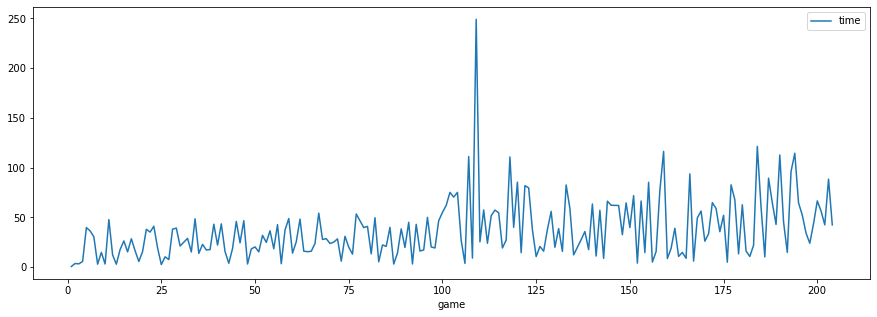

In [5]:
self_play_df = pd.read_csv('../logs/connect4/selfplay_final.csv')
self_play_df.plot("game", "time", figsize=(15,5))

<AxesSubplot:xlabel='winner'>

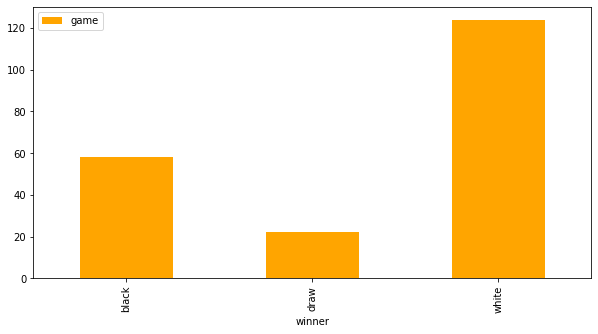

In [6]:
win_df = self_play_df.groupby('winner').count()
del win_df['time']
del win_df['turn']

win_df.plot(kind='bar', figsize=(10,5), color="orange")

In [7]:
import csv
import re

def extract_selfplay_leakyrelu_c4_logs():
    res = [];
    with open("../logs/connect4/selfplay_leakyrelu.log") as f:
        content = f.readlines()
        content = [x.strip() for x in content]
        content = [re.sub(r'^.*?DEBUG #', '', s) for s in content]
        for line in content:
            res.append(re.sub(' +', ' ', line.replace('=', ' ').replace('X', '').replace('O', '').replace('sec,', '').replace(':', ' ').replace('Winner:Winner.', 'Winner ').replace('-', ' ').replace('Winner.', '').strip()))
        return res


final_logs =[]
logs = extract_selfplay_leakyrelu_c4_logs()
for log in logs:
    final_logs.append(log.split()[1::2])


with open('../logs/connect4/selfplay_leakyrelu_final.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('game', 'time', 'turn', 'winner'))    
        writer.writerows(final_logs)

In [2]:
import csv

def extract_self_play_logs():
    res = [];
    with open("../logs/selfplay_data.log") as f:
        content = f.readlines()
        content = [x.strip() for x in content]
        for line in content:
            res.append(line.replace('=', ' ').replace('Winner.', 'Winner '))
        return res


final_logs =[]
logs = extract_self_play_logs()
for log in logs:
    final_logs.append(log.split()[1::2])


with open('../logs/self_play_final.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('game', 'time', 'halfmoves', 'winner'))    
        writer.writerows(final_logs)

<AxesSubplot:xlabel='game'>

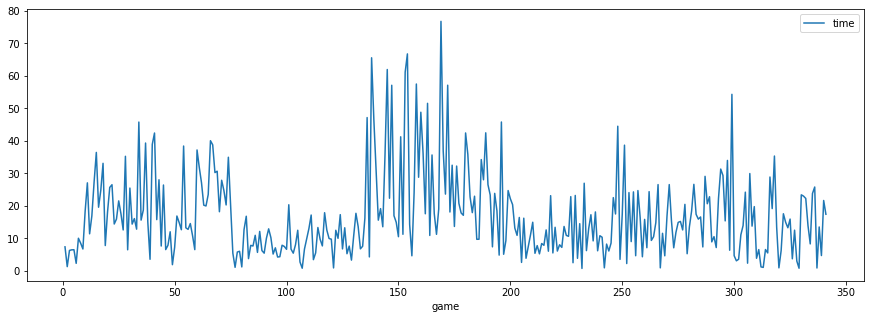

In [8]:
self_play_df = pd.read_csv('../logs/connect4/selfplay_leakyrelu_final.csv')
self_play_df.plot("game", "time", figsize=(15,5))

<AxesSubplot:xlabel='winner'>

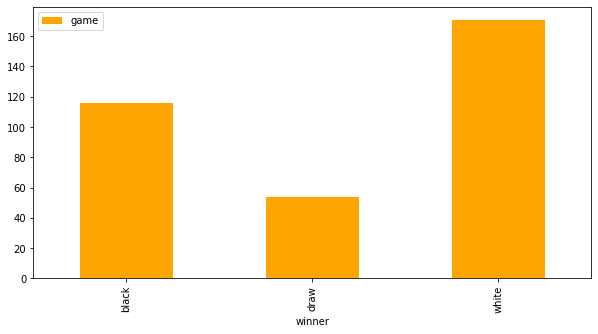

In [10]:
win_df = self_play_df.groupby('winner').count()
del win_df['time']
del win_df['turn']
win_df.plot(kind='bar', figsize=(10,5), color="orange")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
self_play_df = pd.read_csv('../logs/self_play_final.csv')
self_play_df['time'] = self_play_df['time'].map(lambda x: float(x.rstrip('s')))

Relu 

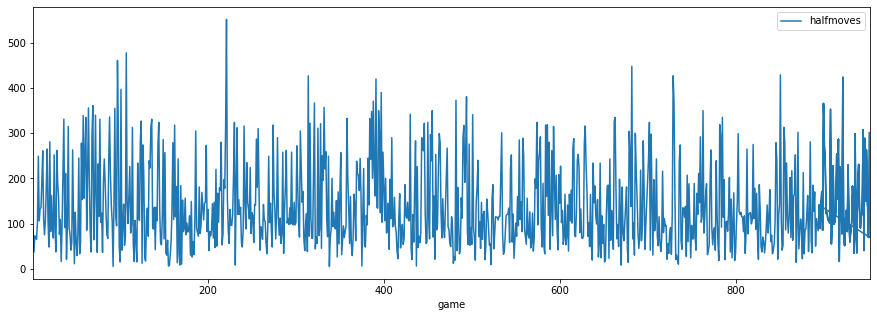

In [5]:
self_play_df.plot("game", "halfmoves", figsize=(15,5))

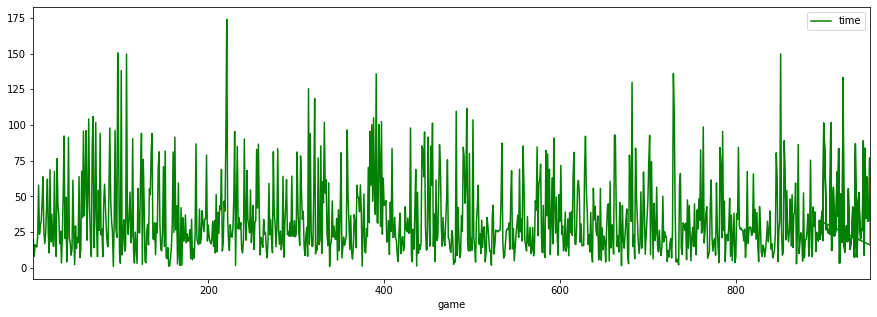

In [6]:
self_play_df.plot("game", "time", color="green", figsize=(15,5))

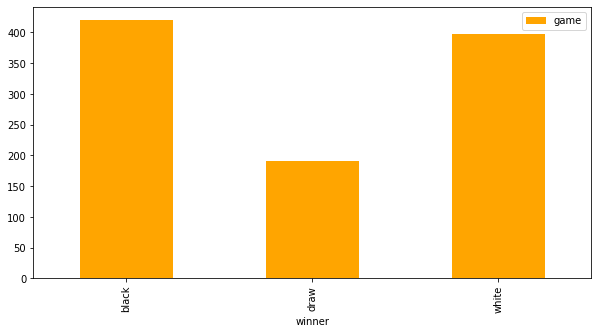

In [7]:
win_df = self_play_df.groupby('winner').count()
del win_df['time']
del win_df['halfmoves']
win_df.plot(kind='bar', figsize=(10,5), color="orange")

In [8]:
def extract_opt_logs(filename):
    res = [];
    with open(filename) as f:
        content = f.readlines()
        content = [x.strip() for x in content]
        for line in content:
            res.append(line.replace('-', ' ').replace(':', ' '))
        return res
    
final_logs =[]
logs = extract_opt_logs("../logs/opt_data.log")
for log in logs:
    final_logs.append(log.split()[0::2])
    
with open('../logs/opt_final.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('duration', 'loss', 'policy_out_loss', 'value_out_loss', 'val_loss', 'val_policy_out_loss', 'val_value_out_loss'))    
        writer.writerows(final_logs)

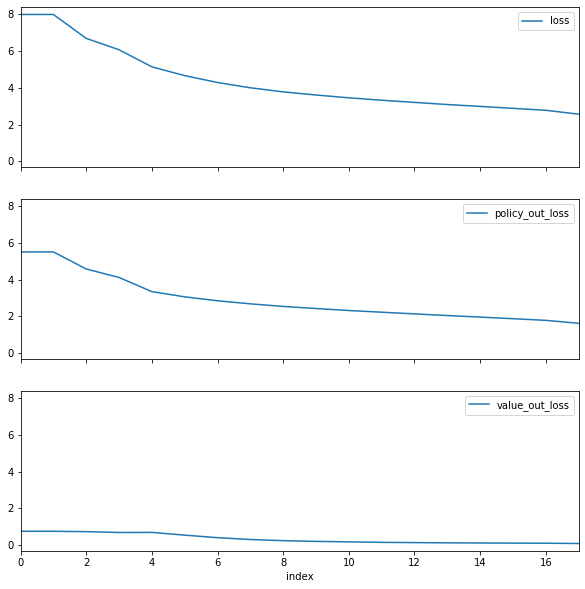

In [9]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(10,10))

opt_df = pd.read_csv('../logs/opt_final.csv')
opt_df = opt_df.reset_index()
opt_df.plot('index', 'loss', ax=ax1)
opt_df.plot('index', 'policy_out_loss', ax=ax2)
opt_df.plot('index', 'value_out_loss', ax=ax3)

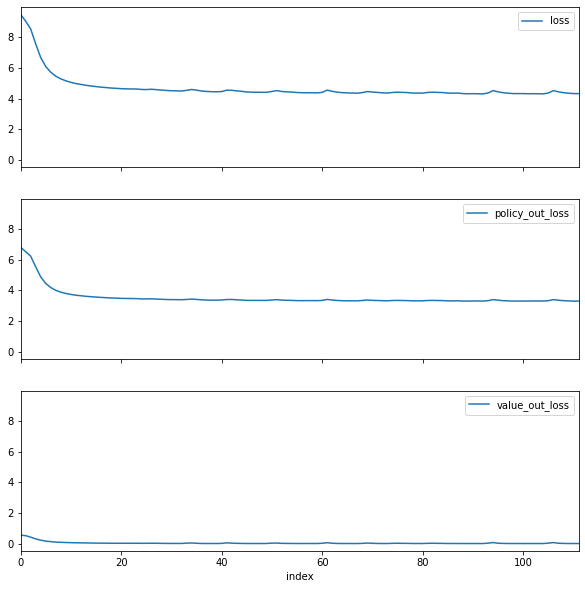

In [10]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(10,10))

opt_df = pd.read_csv('../logs/opt_leaky_relu_final.csv')
opt_df = opt_df.reset_index()
opt_df.plot('index', 'loss', ax=ax1)
opt_df.plot('index', 'policy_out_loss', ax=ax2)
opt_df.plot('index', 'value_out_loss', ax=ax3)

In [11]:
import re

def extract_eval_logs(filename):
    res = [];
    with open(filename) as f:
        content = f.readlines()
        content = [x.strip() for x in content]
        content = [re.sub(r'^.*?DEBUG #', '', s) for s in content]
        for line in content:
            res.append(line.replace(':', ' ').replace('as', 'color').replace('=', ' '))
        return res
    
final_logs =[]
logs = extract_eval_logs("../logs/eval.log")
for log in logs:
    final_logs.append(log.split()[1::2])

with open('../logs/eval_final.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('game', 'ng_score', 'color', 'win_rate'))    
        writer.writerows(final_logs)

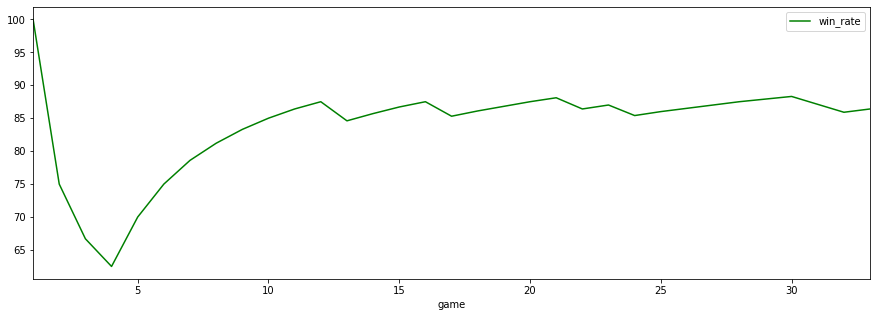

In [12]:
import numpy as np

eval_df = pd.read_csv('../logs/eval_final.csv')
eval_df['win_rate'] = eval_df['win_rate'].map(lambda x: float(x.rstrip('%')))
eval_df.plot("game", "win_rate", color="green", figsize=(15,5))

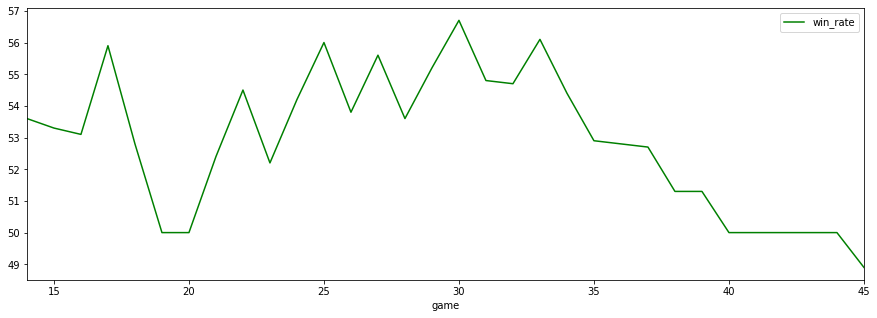

In [13]:
import numpy as np

eval_df = pd.read_csv('../logs/eval_leaky_relu_final.csv')
eval_df['win_rate'] = eval_df['win_rate'].map(lambda x: float(x.rstrip('%')))
eval_df.plot("game", "win_rate", color="green", figsize=(15,5))

In [53]:
import os, sys
sys.path.append(os.path.join('..', 'src'))

In [54]:
from agent.player_chess import ChessPlayer
from lib.config import Config, DemoConfig
from env.chess_env import ChessEnv

In [55]:
def get_player(config):
    from agent.model_chess import ChessModel
    from lib.model_helper import load_best_model_weight
    model = ChessModel(config)
    if not load_best_model_weight(model):
        raise RuntimeError("Best model not found!")
    return ChessPlayer(config, model.get_pipes(config.play.search_threads))

def info(depth, move, score):
    print(f"info score cp {int(score*100)} depth {depth} pv {move}")
    sys.stdout.flush()

In [56]:
default_config = Config()
DemoConfig().update_play_config(default_config.play)
me_player = None
env = ChessEnv().reset()

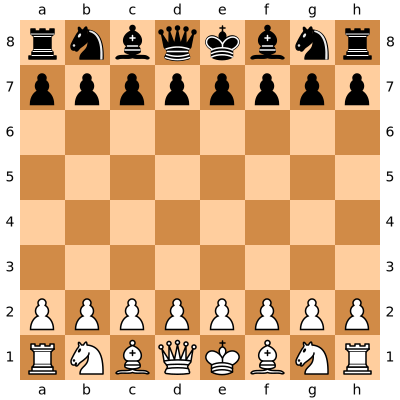

In [57]:
env.board

In [58]:
if not me_player:
    me_player = get_player(default_config)
action = me_player.action(env, False)
print(f"bestmove {action}")

bestmove e2e4


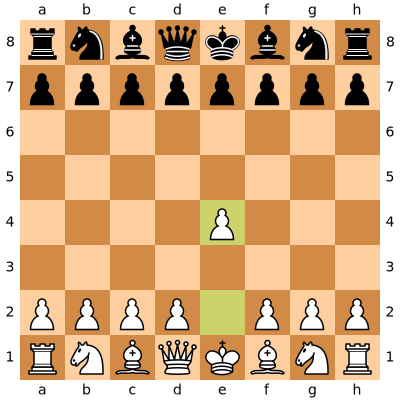

In [59]:
env.step(action)
env.board

In [60]:
if not me_player:
    me_player = get_player(default_config)
action = me_player.action(env, False)
print(f"bestmove {action}")

bestmove g8h6


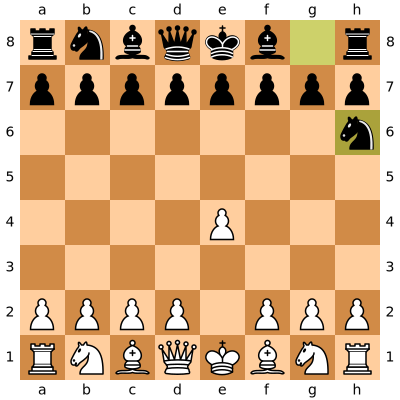

In [61]:
env.step(action)
env.board

In [62]:
if not me_player:
    me_player = get_player(default_config)
action = me_player.action(env, False)
print(f"bestmove {action}")

bestmove g2g3


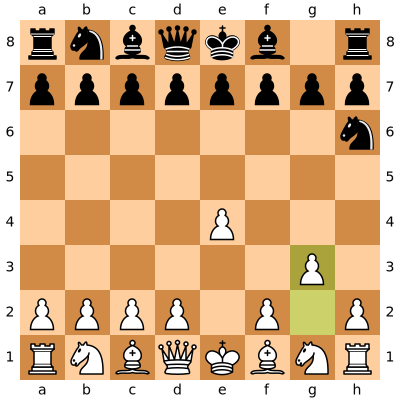

In [63]:
env.step(action)
env.board

bestmove h8g8


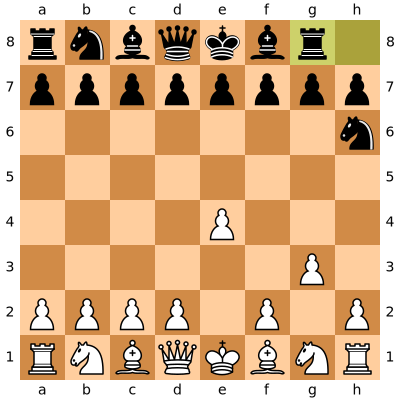

In [64]:
if not me_player:
    me_player = get_player(default_config)
action = me_player.action(env, False)
print(f"bestmove {action}")
env.step(action)
env.board

bestmove g1h3


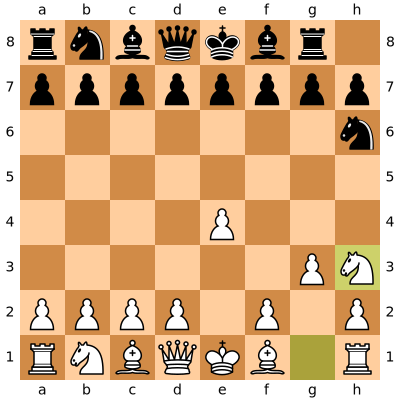

In [65]:
if not me_player:
    me_player = get_player(default_config)
action = me_player.action(env, False)
print(f"bestmove {action}")
env.step(action)
env.board

bestmove h6f5


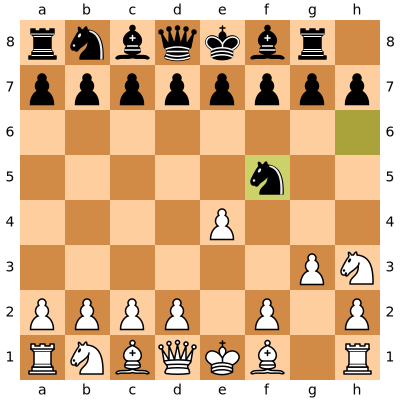

In [66]:
if not me_player:
    me_player = get_player(default_config)
action = me_player.action(env, False)
print(f"bestmove {action}")
env.step(action)
env.board

bestmove e4f5


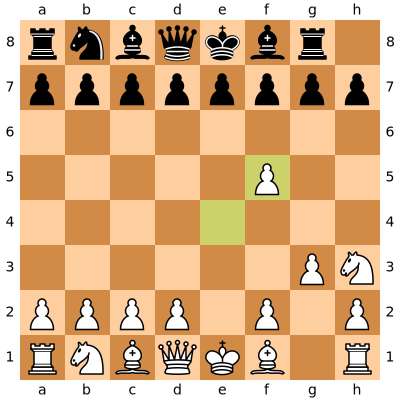

In [67]:
if not me_player:
    me_player = get_player(default_config)
action = me_player.action(env, False)
print(f"bestmove {action}")
env.step(action)
env.board

bestmove b8c6


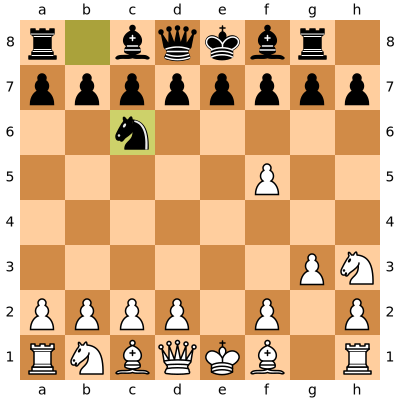

In [68]:
if not me_player:
    me_player = get_player(default_config)
action = me_player.action(env, False)
print(f"bestmove {action}")
env.step(action)
env.board

bestmove f5f6


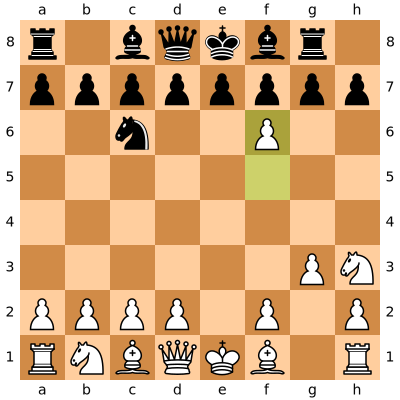

In [69]:
if not me_player:
    me_player = get_player(default_config)
action = me_player.action(env, False)
print(f"bestmove {action}")
env.step(action)
env.board

bestmove g7f6


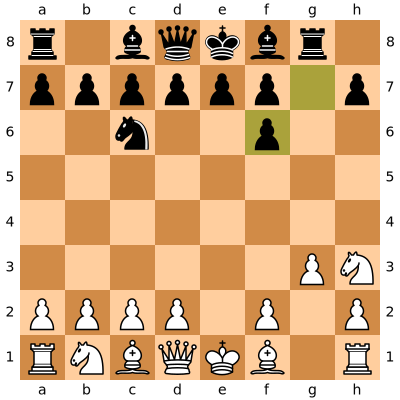

In [70]:
if not me_player:
    me_player = get_player(default_config)
action = me_player.action(env, False)
print(f"bestmove {action}")
env.step(action)
env.board